In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
# Load the dataset from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print(data.head())


   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
# Split the data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [5]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9818
Confusion Matrix:
[[148   0]
 [  5 122]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       148
           1       1.00      0.96      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



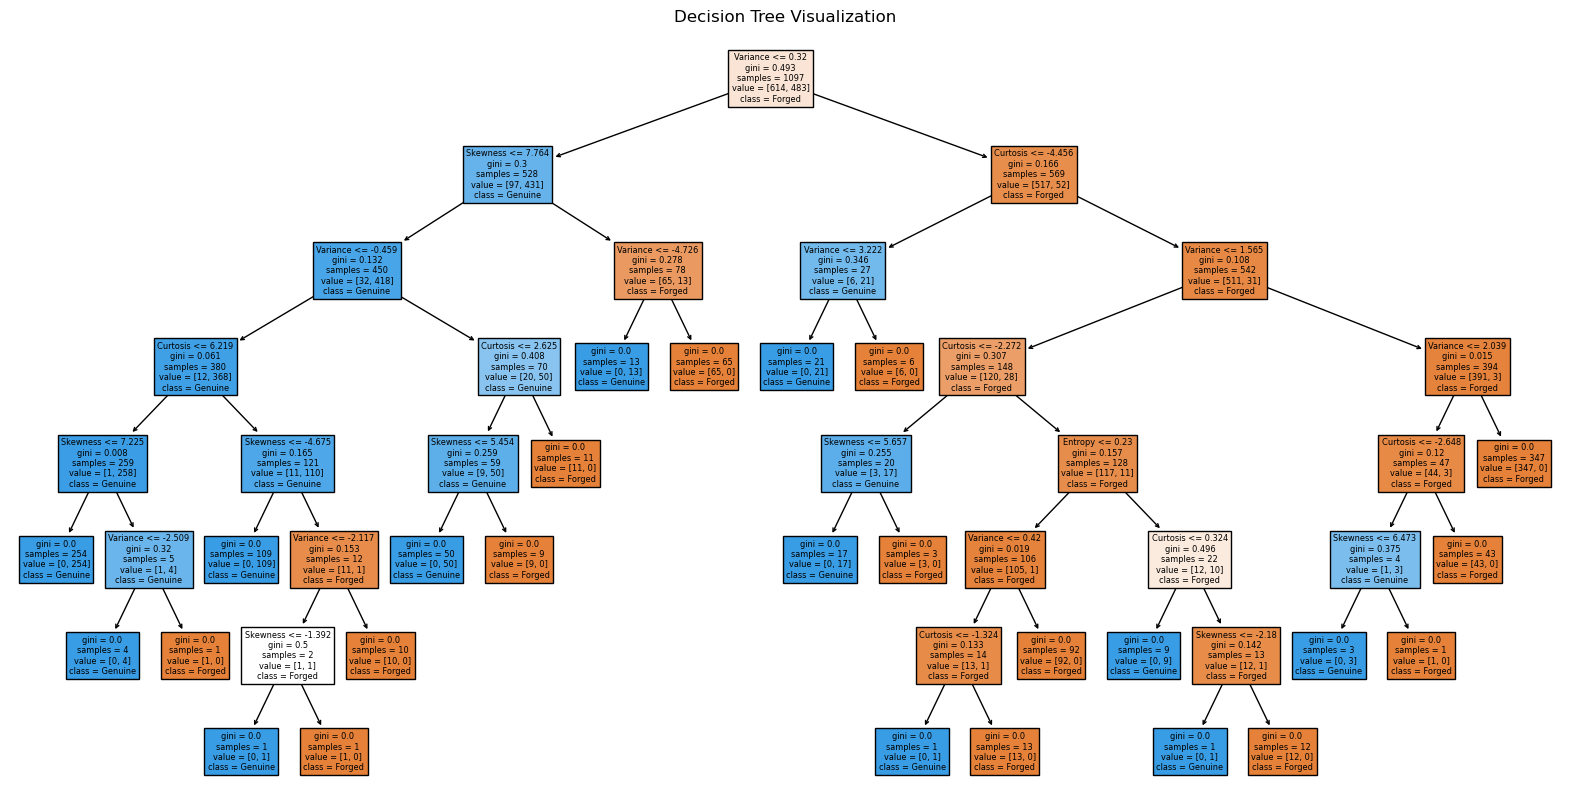

In [6]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, feature_names=columns[:-1], class_names=['Forged', 'Genuine'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()
